In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter
from tqdm import tqdm
import pandas as pd

In [76]:
df = pd.read_csv("filtro1_blackman_harris_a_b.csv", header=None, names=["b"])
b = df["b"].dropna().values
df.head()

,b
0,-6.841325e-08
1,-1.509079e-07
2,1.496236e-21
3,7.124155e-07
4,1.851601e-06


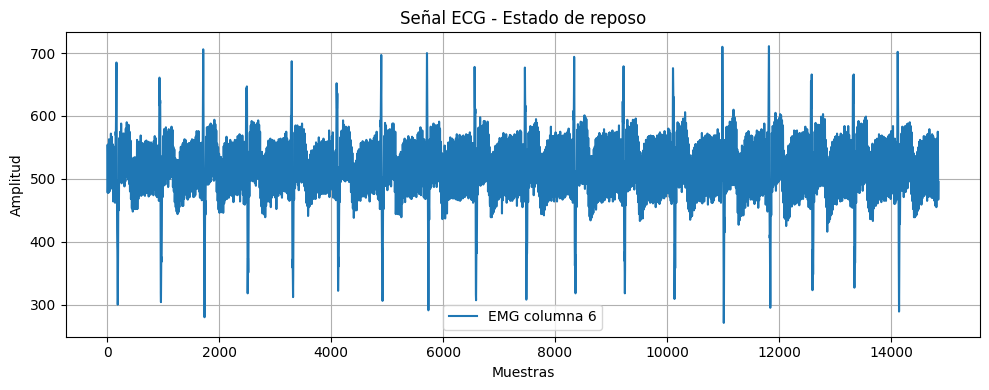

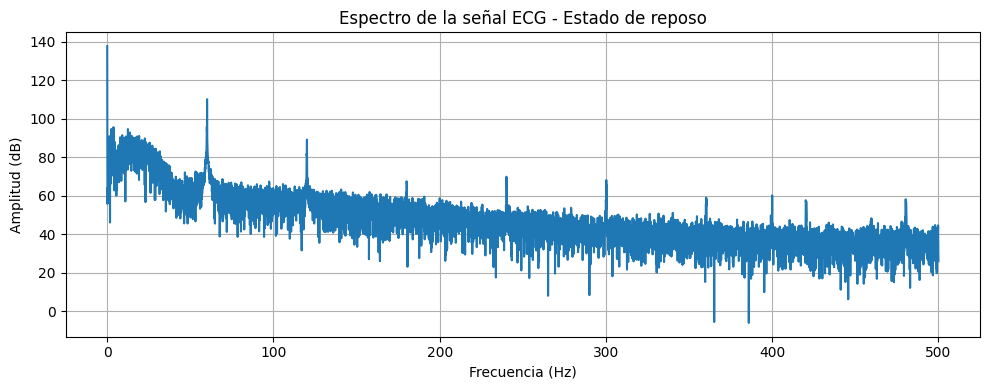

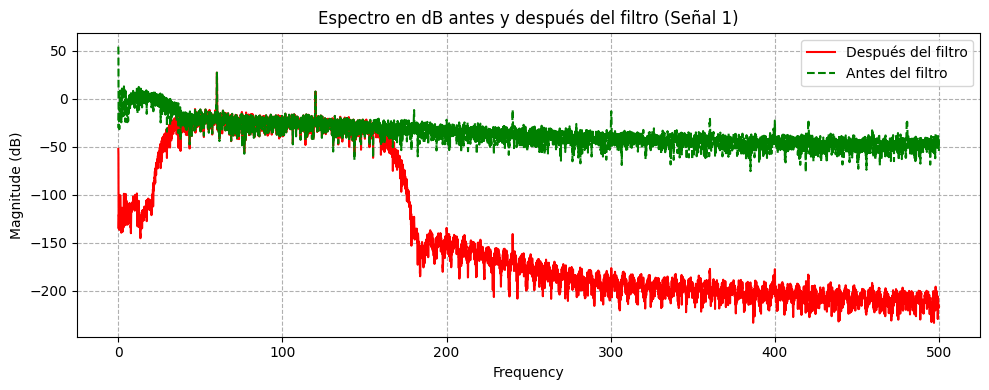

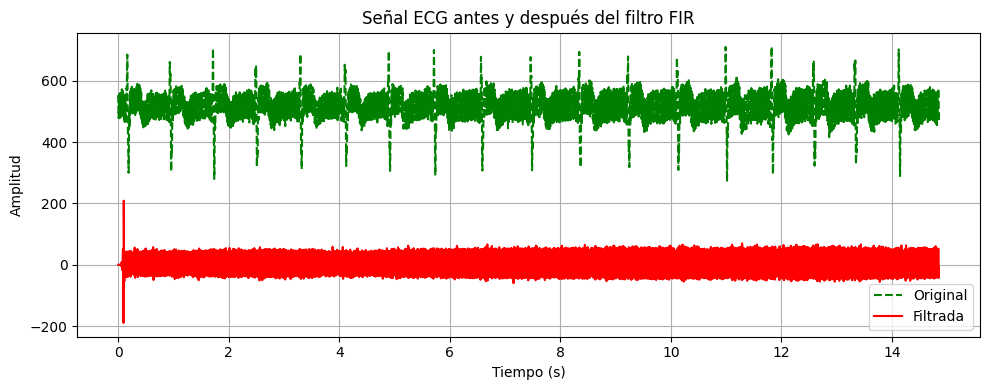

In [77]:
# Cargar todo el archivo
ecg_signal = np.loadtxt("ECG_REPOSO.txt")

ecg_signal = ecg_signal[:, 5]

# Graficar la señal
plt.figure(figsize=(10,4))
plt.plot(ecg_signal, label="EMG columna 6")
plt.title("Señal ECG - Estado de reposo")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Parámetros de muestreo
fs = 1000  # Hz

# FFT
n = len(ecg_signal)
frequencies1 = np.fft.rfftfreq(n, d=1/fs)
spectrum1 = np.abs(np.fft.rfft(ecg_signal))

# Conversión a decibelios
spectrum_db_1 = 20 * np.log10(spectrum1 + 1e-12)  # 1e-12 evita log(0)

# Graficar en dB
plt.figure(figsize=(10, 4))
plt.plot(frequencies1, spectrum_db_1)
plt.title("Espectro de la señal ECG - Estado de reposo")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud (dB)")
plt.grid(True)
plt.tight_layout()
plt.show()

#Señal 1 en dB
y1 = lfilter(b, 1, ecg_signal)

# Espectros en dB
plt.figure(figsize=(10,4))
plt.magnitude_spectrum(y1, Fs=1000, scale='dB', color="red", label="Después del filtro")
plt.magnitude_spectrum(ecg_signal, Fs=1000, scale='dB', color="green", ls="--", label="Antes del filtro")

plt.legend()
plt.grid(True, ls="--")
plt.title("Espectro en dB antes y después del filtro (Señal 1)")
plt.tight_layout()
plt.show()

#Comparación en el dominio temporal
# Vector de tiempo en segundos
t = np.arange(len(ecg_signal)) / fs

# Comparación en el dominio temporal
plt.figure(figsize=(10, 4))
plt.plot(t, ecg_signal, label="Original", color="green", linestyle="--")
plt.plot(t, y1, label="Filtrada", color="red")
plt.title("Señal ECG antes y después del filtro FIR")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

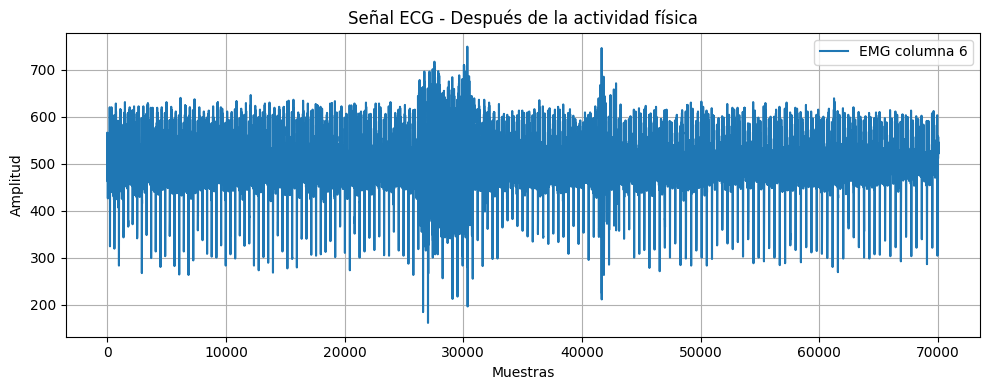

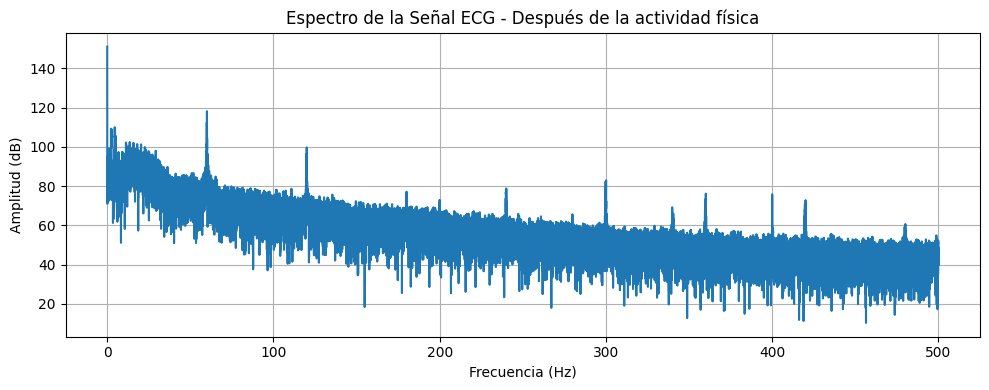

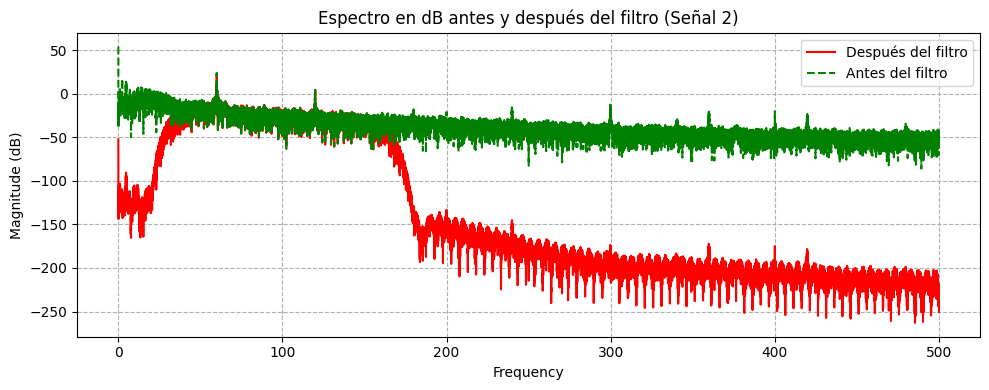

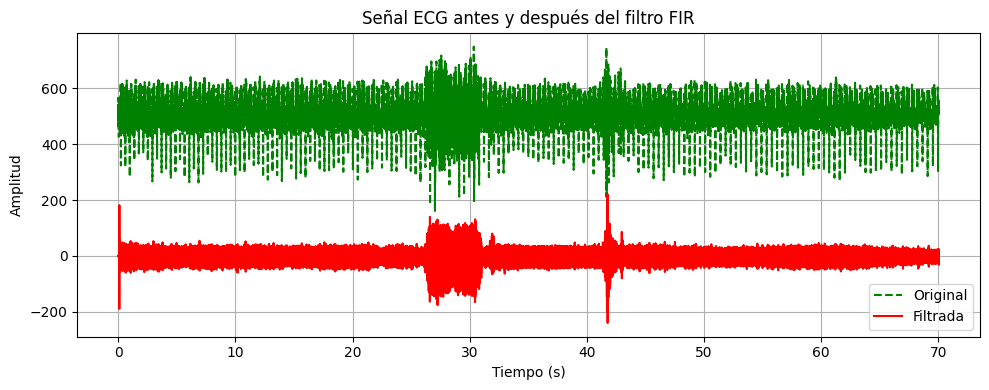

In [78]:
# Cargar todo el archivo 2
ecg_signal_2 = np.loadtxt("ECG_ACTFISICA_01.txt")

# Extraer solo la columna 6 (índice 5)
ecg_signal_2 = ecg_signal_2[:, 5]

# Graficar la señal
plt.figure(figsize=(10,4))
plt.plot(ecg_signal_2, label="EMG columna 6")
plt.title("Señal ECG - Después de la actividad física")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Parámetros de muestreo
fs = 1000  # Hz

# FFT
n = len(ecg_signal_2)
frequencies = np.fft.rfftfreq(n, d=1/fs)
spectrum = np.abs(np.fft.rfft(ecg_signal_2))

# Conversión a decibelios
spectrum_db = 20 * np.log10(spectrum + 1e-12)  # 1e-12 evita log(0)

# Graficar en dB
plt.figure(figsize=(10, 4))
plt.plot(frequencies, spectrum_db)
plt.title("Espectro de la Señal ECG - Después de la actividad física")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud (dB)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Señal 2 filtrada
y2 = lfilter(b, 1, ecg_signal_2)

# Espectros en dB
plt.figure(figsize=(10,4))
plt.magnitude_spectrum(y2, Fs=1000, scale='dB',color="red", label="Después del filtro")
plt.magnitude_spectrum(ecg_signal_2, Fs=1000, scale='dB', color="green", ls="--", label="Antes del filtro")

plt.legend()
plt.grid(True, ls="--")
plt.title("Espectro en dB antes y después del filtro (Señal 2)")
plt.tight_layout()
plt.show()

#Comparación en el dominio temporal
# Vector de tiempo en segundos
t = np.arange(len(ecg_signal_2)) / fs

# Comparación en el dominio temporal
plt.figure(figsize=(10, 4))
plt.plot(t, ecg_signal_2, label="Original", color="green", linestyle="--")
plt.plot(t, y2, label="Filtrada", color="red")
plt.title("Señal ECG antes y después del filtro FIR")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

